In [1]:
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd/content/drive/"My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [4]:
#columnName = ['date','med_temp','min_temp','max_temp','precipitaion','final','consumption']
dataset = pd.read_csv("beer_data.csv", decimal=',')
dataset = dataset.iloc[1:]
print(dataset)


           Data  ...  Consumo de cerveja (litros)
1    2015-01-02  ...                       28.972
2    2015-01-03  ...                       30.814
3    2015-01-04  ...                       29.799
4    2015-01-05  ...                       28.900
5    2015-01-06  ...                       28.218
..          ...  ...                          ...
936         NaN  ...                          NaN
937         NaN  ...                          NaN
938         NaN  ...                          NaN
939         NaN  ...                          NaN
940         NaN  ...                          NaN

[940 rows x 7 columns]


In [5]:
dataset.columns = ['date', 'med_temp', 'min_temp','max_temp', 'precipitation','isWeekend','consumption']
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 1 to 940
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           364 non-null    object 
 1   med_temp       364 non-null    float64
 2   min_temp       364 non-null    float64
 3   max_temp       364 non-null    float64
 4   precipitation  364 non-null    float64
 5   isWeekend      364 non-null    float64
 6   consumption    364 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.5+ KB


In [6]:
dataset.head

<bound method NDFrame.head of            date  med_temp  min_temp  ...  precipitation  isWeekend  consumption
1    2015-01-02     27.02      24.5  ...            0.0        0.0       28.972
2    2015-01-03     24.82      22.4  ...            0.0        1.0       30.814
3    2015-01-04     23.98      21.5  ...            1.2        1.0       29.799
4    2015-01-05     23.82      21.0  ...            0.0        0.0       28.900
5    2015-01-06     23.78      20.1  ...           12.2        0.0       28.218
..          ...       ...       ...  ...            ...        ...          ...
936         NaN       NaN       NaN  ...            NaN        NaN          NaN
937         NaN       NaN       NaN  ...            NaN        NaN          NaN
938         NaN       NaN       NaN  ...            NaN        NaN          NaN
939         NaN       NaN       NaN  ...            NaN        NaN          NaN
940         NaN       NaN       NaN  ...            NaN        NaN          NaN

[940 rows

In [7]:
dataset.shape

(940, 7)

In [8]:
dataset.dropna()

,date,med_temp,min_temp,max_temp,precipitation,isWeekend,consumption
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
5,2015-01-06,23.78,20.1,30.5,12.2,0.0,28.218
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1.0,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0.0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0.0,20.467


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 1 to 940
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           364 non-null    object 
 1   med_temp       364 non-null    float64
 2   min_temp       364 non-null    float64
 3   max_temp       364 non-null    float64
 4   precipitation  364 non-null    float64
 5   isWeekend      364 non-null    float64
 6   consumption    364 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.5+ KB


In [10]:
dataset['consumption'] = dataset['consumption'].astype(float) 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 1 to 940
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           364 non-null    object 
 1   med_temp       364 non-null    float64
 2   min_temp       364 non-null    float64
 3   max_temp       364 non-null    float64
 4   precipitation  364 non-null    float64
 5   isWeekend      364 non-null    float64
 6   consumption    364 non-null    float64
dtypes: float64(6), object(1)
memory usage: 51.5+ KB


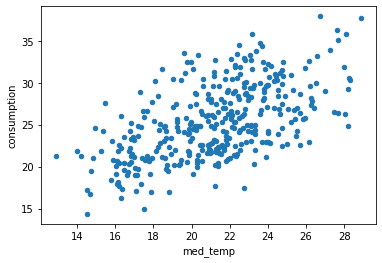

In [11]:
dataset.plot(kind='scatter', x='med_temp', y= 'consumption' )

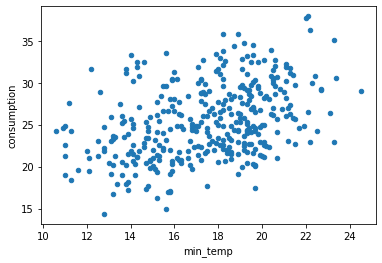

In [12]:
dataset.plot(kind='scatter', x='min_temp',y='consumption')

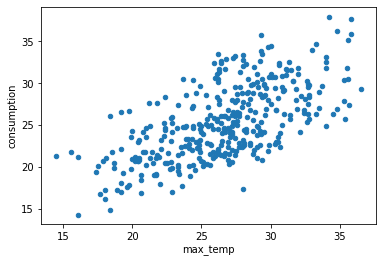

In [13]:
dataset.plot(kind='scatter',x='max_temp',y='consumption')

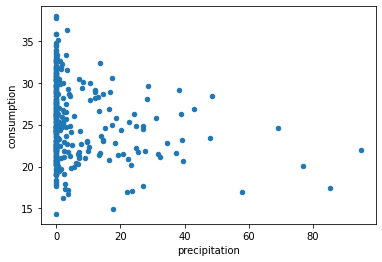

In [14]:
dataset.plot(kind='scatter',x='precipitation',y='consumption')

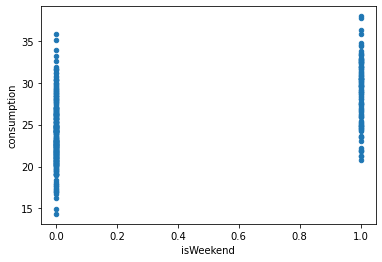

In [15]:
dataset.plot(kind='scatter',x='isWeekend',y='consumption')

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
dataset = dataset.dropna()
features = ['med_temp', 'precipitation','isWeekend']
X=dataset[features]
Y=dataset.consumption
X_train, X_test, Y_train, Y_Test = train_test_split(X,Y, random_state =1)

In [24]:
model = LinearRegression() 

In [25]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_predict = model.predict(X_test)

In [27]:
print(features, model.coef_)

['med_temp', 'precipitation', 'isWeekend'] [ 0.83046685 -0.0789426   5.3128114 ]


In [28]:
model.score(X_test,Y_Test)

0.6376428998276019